In [101]:
import pandas as pd
#ata = '/python/data/1115_tube_ofl_2.csv' #ofl_rank2.csv'
import os
os.chdir('/0GoogleDrive/Research/Result/tube/')
data = 'temp.xlsx'
df = pd.read_excel(data)


In [128]:
ss =r'E:\0Temp_data\Tube\tube_OFL\20181115_tube_OFL_batch2'
#os.path.split(ss)
os.chdir(ss)
ii = ss.find('Temp')
ss[ii]

'T'

In [125]:
ofl=np.array(0)

a=pd.DataFrame()
#s = type(a)
len(ofl.shape)
len(a.shape)
a=np.array(0)

In [126]:
a.append([1,3])
np.a

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [102]:
### _ 찾으면 직전까지가 날짜. 그다음 batch 찾아서 그 다음숫자가 배치 번호

##### cage 별로 접근할것 따로.
# ex) variability, dob 등?

# 자잘한 raw data  와 avg 등 주로 쓰는 것 따로 저장하기

# 한번 들어가 csv 찾아 OFL obs / dem, ret 폴더 가서 csv로 ret 정보도

############### 1. baseline threshold 정하기. peak 값 등.
base_thr = 10
df = df[df['baseline']<base_thr]
#df1 = df1[df1['subdom']!=0]

## subject id. 
# experiment # batch # cage # no
sub_list = ['batch','cage','no']
df.insert(0,column='subject',value='')
#df.drop(columns='23') #제거
for i in df.index:
    temp = df.loc[i,:]
    sub_temp=''
    subject = [int(temp[j]) for j in sub_list]
    subject =''.join(str(k) for k in subject)
    df.loc[i,'subject']=subject    
## df.loc[:,['batch','cage']]

# batch / cage
# age cal

## rank by win no.
#df['win']


## sub dom
df.loc[df['rank']<3,'subdom']='dom'
df.loc[df['rank']>3,'subdom']='sub'

#df.reindex(columns=['subject'])

In [103]:
df
#df = df.reset_index()
#df.rename(columns={0:'subjecdt'}, inplace=True)
#df.rename(index=str)#, columns={"OFL": "avg OFL (%)", "rank":'Rank'})

,subject,batch,cage,no,weight,win,rank,subdom,baseline,ofl
1,112,1,1,2,24.6,2,3,0,2.082,12.2975
2,113,1,1,3,25.8,4,1,dom,1.072,1.3700
3,114,1,1,4,22.5,0,5,sub,3.060,4.6950
4,115,1,1,5,23.7,1,4,sub,1.902,18.7850
6,122,1,2,2,25.1,2,3,0,2.776,6.1250
7,123,1,2,3,27.4,0,5,sub,3.936,12.1300
8,124,1,2,4,26.9,4,1,dom,3.780,8.4550
9,125,1,2,5,26.3,3,2,dom,6.954,10.5000
10,141,1,4,1,27.4,2,3,0,2.324,13.4825
11,142,1,4,2,27.3,4,1,dom,3.040,7.2375


In [40]:
#df1 = df[df['baseline']<10]
df1 = df1[df1['subdom']!=0]

In [95]:
#rank_ofl = df1.pivot_table(index=df1.index, columns=['subdom'], values = ['ofl'])
rank_ofl = df.pivot_table(index=df.index, columns=['win'], values = ['ofl'])

In [5]:
import sys
import os
import glob
sys.path.insert(0, 'F:\\github/dataplot/')
os.chdir('F:\\')
import data_process as dp

In [2]:
import pandas as pd
import numpy as np
#csv_file = f_list[0]

def read_ofl(csv_file):
    time_bin = 9
    df = pd.read_csv(csv_file, header=None, skiprows=3).iloc[:,0:time_bin+1]
    
    #print(df.keys())
    key_subject = df.keys()[0] # pandas 로 csv read 시, 기본 key 탐색 (첫번째 row)
    obs = df[df[key_subject].str.contains("dem|exclude")==False]  # dem, exclude 중 하나라도 포함되어 있으면 제외 -> obs 데이터만 추출 가능
    #print(df.values.shape)
    base_m = np.mean(df.iloc[:,1:6], axis=1)
    ofl_m = np.mean(df.iloc[:,6:], axis=1)
    #print(df.iloc[0,0])
    obs['b_avg']=base_m
    obs['ofl_avg']=ofl_m
    
    n_total = obs.values.shape[0]
    n_mice = 5
    
    n_cage = int(n_total/n_mice) # cage 수
    #print(n_cage)
    total_coef_var = []
    for i in range(n_cage):
        target_sample = obs.iloc[i*n_mice:i*n_mice+n_mice,-1]
        
        #print(target_sample)
        mm = np.mean(target_sample)
        ss = np.std(target_sample, ddof=1) # ddof =1 to apply sample std
        coef_var = ss/mm
        #print(mm, ss,coef_var)
        total_coef_var.append(coef_var)
        
        #obs.iloc[i*n_mice:i*n_mice+n_mice].assign(coef =coef_var)
    #obs['coef'] = total_coef_var
    np.std()
    return obs, total_coef_var

In [7]:
#path_3 = 'E:\\'
#path = '0Temp_data/20180911_OFL_after_tube_n3_batch1/'
#path_name = os.path.join(path_3,path)
import os
import glob
path = '/python/data/tube/'
os.chdir(path)
f_list = glob.glob('./*.csv')
ofl = pd.DataFrame()

#avg = np.empty((0,1))
coef = []
for i in f_list:
    if 'freeze' not in i:
        print('other file')
    else:
        obs, coef_var  = read_ofl(i)
        coef.append(coef_var)
        ofl = ofl.append(obs)

other file
other file
other file


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
#path2 = '../test_ofl_std.csv'
obs2, coef2=read_ofl(data)  # population std. excel 은 sample std
#np.std()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
obs2.to_csv('tube_ofl2.csv')

In [14]:
coef

[0.7001430997822031, 0.24637184525578054, 0.6755237661794141]

In [7]:
import os
os.getcwd()

'F:\\github\\test'

In [28]:
import os
print(os.getcwd())
os.chdir('/python/data/tube/')
#name = 'full_rank_ofl_.xlsx'
name = 'total_rank_ofl_test.xlsx'
df = pd.read_excel(name, index_col=0)#, header=None, skiprows=3).iloc[:,0:time_bin+1]
#col_names = pd.read_excel('rank_ofl.xlsx', index_col=0).columns

#df = df.reset_index()
#df.rename(columns={0:'subject'}, inplace=True)

#df['Rank']=df.Rank.astype(int)


#df.head()
#df = df[df.index != 144] # baseline 높은 쥐 제거
#df_r = df.pivot_table(index=df.keys()[0],columns = df.keys()[2],values=df.keys()[1])

F:\0GoogleDrive\Research\Result\tube


In [ ]:
fdf['batch']

In [73]:
#df[df['Rank']==0]

'11' in str(df.index) 
#test = str(df.index) 
df.head(20)

,base_avg,avg OFL (%),ret_avg,Empathy,Rank,Subdom,weight,base_norm_ofl,min_max_scale
subject,,,,,,,,,
111,4.156,18.7475,19.1875,High,1,NaN,28.8,14.5915,NaN
112,1.118,11.0925,3.6700,NaN,2,NaN,30.0,9.9745,NaN
113,2.212,14.3150,9.5950,High,3,NaN,29.5,12.1030,NaN
114,1.452,7.6875,3.8350,Low,4,NaN,30.5,6.2355,NaN
115,2.122,9.4950,1.4225,Low,0,NaN,NaN,7.3730,NaN
121,1.184,7.3175,12.1575,High,3,NaN,27.0,6.1335,NaN
122,0.492,1.3975,2.0375,Low,4,NaN,29.7,0.9055,NaN
123,0.156,3.3525,0.3625,Low,2,NaN,27.0,3.1965,NaN
124,1.722,6.2275,9.8625,NaN,5,NaN,29.0,4.5055,NaN


In [209]:
df = pd.read_excel('total_rank_ofl_test.xlsx')
#df = df.drop(index = df.index[df['Rank']==0]) # high baselinen 제거


In [199]:

#### 특정 배치 제외. 처음 것 제외
df = df[df['subject']>200]

In [214]:
#### linear rank only. sub dom.
df = df[df['linear_rank']=='y'] # linear rank only 
#rank_ofl = df.pivot_table(index=df.index,columns=df.keys()[8],values=df.keys()[5])

In [211]:
# high baseline 제외.

df=df.drop(index=df.index[df['subject']==144])
df['Rank']=df['Rank'].fillna(0).astype(int)
df = df.drop(index = df.index[df['Rank']==0])
df.head()
rank_ofl = df.pivot_table(index=df.index,columns=df['Rank'],values=df.keys()[5])

In [69]:
##############
total_coef_var=[]
total_min_cage = []
total_max_cage = []
n_mice = 5
n_cage=10
total_target = []
import numpy as np
for i in range(n_cage):
        #i*n_mice i*(n_mice+1)
        target_sample = df.iloc[i*n_mice:i*n_mice+n_mice,1]
        
        #print(target_sample)
        mm = np.mean(target_sample)
        ss = np.std(target_sample, ddof=1) # ddof =1 to apply sample std
        min_cage = np.min(target_sample)
        max_cage = np.max(target_sample)
        coef_var = ss/mm
        
        #print(mm, ss,coef_var)
        total_coef_var.append(coef_var)
        total_min_cage.append(min_cage)
        total_max_cage.append(max_cage)
        total_target.append((target_sample-min_cage)/(max_cage-min_cage)*100)

In [59]:
subject =str(df.index[0]) # subject
batch = subject[0] # batch
group = subject[1] #group

#df.index.contains('11')# match('11')

'1'

In [355]:
count = 0
result = pd.Series()# DataFrame()
for i in list(set(df['batch'])): # batch 마다 탐색
    print(i)
    #temp = df[df['batch']==i]
    for j in list(set(df['cage'])):
        #cur = temp[temp['cage']==j]
        temp = df[(df['cage']==j) & (df['batch']==i)]
        
        temp = temp['base_norm_ofl']
        #df.iloc[:,4] #ofl
        min_val = np.min(temp)
        max_val = np.max(temp)
        mean_val = np.mean(temp)
        std_val = np.std(temp, ddof=1)
        #temp = (temp-min_val)/(max_val-min_val)*100
        temp = (temp-mean_val)/std_val*100
        #temp=temp.values
        #print(type(temp))
        count+=1
        result = result.append(temp)
        
        
print(count)
        

1
2
3
12


In [289]:
import csv

with open("output.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(result)

In [356]:
df['z']=result

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [358]:
#rank_ofl = df.pivot_table(index=df.index,columns=df.keys()[1],values=df.keys()[0])
subdom_ofl = df.pivot_table(index=['subject'], columns=['group'], values = ['z'])
rank_ofl = df.pivot_table(index=['subject'], columns=['Rank'], values = ['z'])

In [123]:
subdom_ofl.to_csv('subdom_linear_rank.csv')

In [419]:
a=[1,5,3,5 ,7]
a.sort()
if a.count(15):
    print('y')

In [91]:
###### customize color palette
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
beach_towel = ['#fe4a49', '#2ab7ca', '#fed766', '#e6e6ea', '#f4f4f8']
pastel_rainbow = ['#a8e6cf','#dcedc1','#ffd3b6','#ffaaa5', '#ff8b94']

list_palette = [flatui,
             beach_towel,
             pastel_rainbow]


In [92]:
#title = 'OFL vs body weight'
title = 'Social Rank vs OFL'
#ylabel = 'Weight (g)'
ylabel = 'avg OFL (%)'
margin=50
#ylim=[np.min(data.min()-margin),np.max(data.max()+margin*2)]
ylim=[0,40]

import matplotlib.patches as mpatches
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ofl_beach = [beach_towel[1],beach_towel[2]]
bar_width = .6

size = 10
params = {
   'axes.labelsize': size,
    "axes.titlesize":size,
    "axes.labelsize":size,
   'font.size': size,
   'legend.fontsize': size,
   'legend.frameon':False,
   'xtick.labelsize': size,
   'ytick.labelsize': size,
   'text.usetex': False,
   'figure.figsize': [5, 6] # instead of 4.5, 4.5
   }

plt.rcParams.update(params)

def color_setting(list_palette=list_palette, n_color=2):
    sns.set_style('whitegrid')
    sns.set_color_codes()
    
    if n_color <=3:  # color 종류 별로 안써도 되는 경우
        print('color mapping')
        for i, i_p in enumerate(list_palette):
            list_palette[i] = i_p[::2]  #홀수 값만 취함. 
    
    #### 
    #sns.set_palette('hls',n_color) # Reds
    sns.set_palette(list_palette[1], n_color)
    #sns.set_palette(ofl_beach,n_color)
    current_palette = sns.color_palette()
    sns.palplot(current_palette)
    ###
    sns.set_context('talk', font_scale=1)#, rc={"lines.linewidth": 2}) # “paper”, “talk”, and “poster”, which are version of the notebook parameters scaled by .8, 1.3, and 1.6,
    #sns.set_context("talk", font_scale=1,rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":5})   
    return current_palette

def legend_patch(current_palette, labels):
    patches = []
    for i, _ in enumerate(labels):
        patch_i = mpatches.Patch(color=current_palette[i], label=labels[i])
        patches.append(patch_i)
    return patches
def plot_bar_scatter_multi(data, current_palette, labels):
      
    patches = legend_patch(current_palette, labels)   # to add legend
   
    fig, ax = plt.subplots(figsize=(8,6))
    
    sns.barplot(data=data, ci=68,errwidth = 2, capsize=.05, ax= ax)
    sns.stripplot(data=data, jitter=True, size= 7,  
                  edgecolor = 'gray', linewidth=1, ax=ax)#,color="0.4")
    ax.grid(False)
    
    ax.set(title = title,
          ylabel=ylabel,
          #xlabel='trial',
          ylim=ylim)
    
    ax.legend(handles = patches, loc='best', edgecolor =None,  bbox_to_anchor=(0.9,0.85)) # upper rightfontsize=13,
    #ax.axis('equal')
    ax.set_title(title,fontsize=22)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    change_width(ax, bar_width) # bar_width
    
    fig.tight_layout()
    fig.show()
    fig.savefig('{}_bar_scatter.png'.format(title), transparent = True, dpi=200)    
    
def change_width(ax, new_value):
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        # change bar width
        patch.set_width(new_value)
        # recenter
        patch.set_x(patch.get_x() + diff * .5)
        
def data_vec(data):  # convert Pandas dataframe into vectors
    n_category = len(data.keys())
    d_list = [0 for i in range(n_category)]
    legend=[]
    for i, i_key in enumerate(data.keys()):
        d_list[i] = np.array(data[i_key])
        d_list[i] = d_list[i][np.isnan(d_list[i])==False]  # remove NaN
        print('n = {}'.format(len(d_list[i])))
        #legend.append(str(int(i_key)) + ' (n={})'.format(len(d_list[i])))
        legend.append(str(i_key)+ ' (n={})'.format(len(d_list[i])))
    return d_list, legend


n = 4
n = 6
n = 5
n = 6
n = 4


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


[(0.996078431372549, 0.2901960784313726, 0.28627450980392155),
 (0.16470588235294117, 0.7176470588235294, 0.792156862745098),
 (0.996078431372549, 0.8431372549019608, 0.4),
 (0.9019607843137255, 0.9019607843137255, 0.9176470588235294),
 (0.9568627450980393, 0.9568627450980393, 0.9725490196078431)]

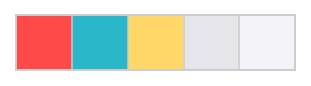

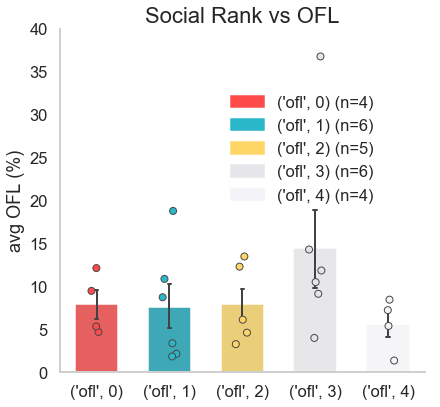

In [97]:
### bar scatter : rank vs OFL
import numpy as np
#rank_ofl = df.pivot_table(index=df.index,columns=df.keys()[1],values=df.keys()[0])
#rank_ofl = rank_ofl[rank_ofl.columns[1:]] # NaN 이 rank 0 이 되어 제거
#plt.autoscale()
# plot
#data= subdom_ofl
data = rank_ofl
d_list, legend = data_vec(data)        
n_class = len(legend)
current_palette = color_setting(list_palette, 5)
plot_bar_scatter_multi(data, current_palette, legend)


current_palette

In [54]:
[i*255 for i in current_palette[0]]

[254.0, 74.0, 73.0]

In [149]:
os.chdir('/python/data/tube/')
df2 = pd.read_excel('fear_ofl2.xlsx', index_col=None)#, header=None, skiprows=3).iloc[:,0:time_bin+1]
fear = df2.iloc[:,0]
fear = fear[fear.notnull()]
oo = df2.iloc[:,1]
oo = oo[oo.notnull()]
#df2['Fear']
oo

fear_norm = (fear-fear.min())/(fear.max()-fear.min())
oo_norm = (oo-oo.min())/(oo.max()-oo.min())
#fear.min()


In [150]:
f=fear_norm.std() /fear_norm.mean()*100
o=oo_norm.std()/oo_norm.mean()*100
#print(f,o)
f=fear.std() /fear.mean()*100
o=oo.std()/oo.mean()*100
print(fear.mean(), fear.std())
print(oo.mean(), oo.std())
print(f,o)
#len(fear)
#len(oo)

42.39399999999999 11.362399198917258
9.631453125 7.205802638741196
83.0341946720057 111.73600581476073


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


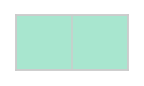

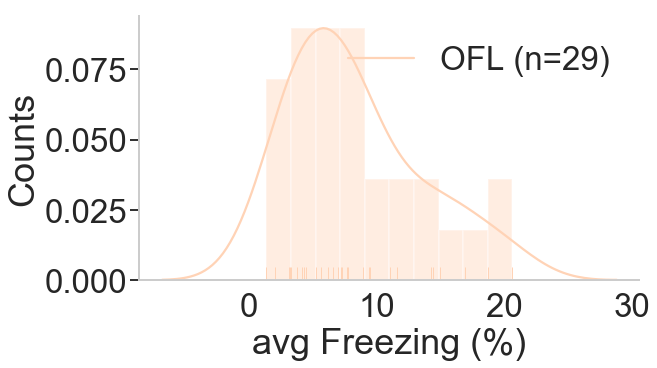

In [177]:

import seaborn as sns
#data= ofl['ofl_avg']
#data = [fear, oo]
color_setting(n_color=2)
#data = fear.append(oo)
f,ax1 = plt.subplots()
color_list = ['#a8e6cf','#ffd3b6']
bins = 10
#sns.distplot(fear,bins = bins,color=color_list[0],ax=ax1, rug=True, kde=False)
sns.distplot(data,bins = bins,color=color_list[1], norm_hist=True, ax=ax1, rug=True, kde=False)
#d_list[i] = d_list[i][np.isnan(d_list[i])==False] 
#pd.isnull

ax2 = ax1.twinx()
#ax2.set_ylim(0,0.08)
ax2.yaxis.set_ticks([])
#ax2.set_ylabel('norm')
#sns.kdeplot(fear,color=color_list[0],ax=ax2, label='Fear (n=22)')
sns.kdeplot(data,color=color_list[1],ax=ax2,label='OFL (n=29)')
ax1.set_xlabel('avg Freezing (%)')
ax1.set_ylabel('Counts')
 
ax1.grid(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
f.tight_layout()
f.savefig('dist_new.png', transparent = True, dpi=200)   

In [172]:
os.getcwd()

'F:\\'

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


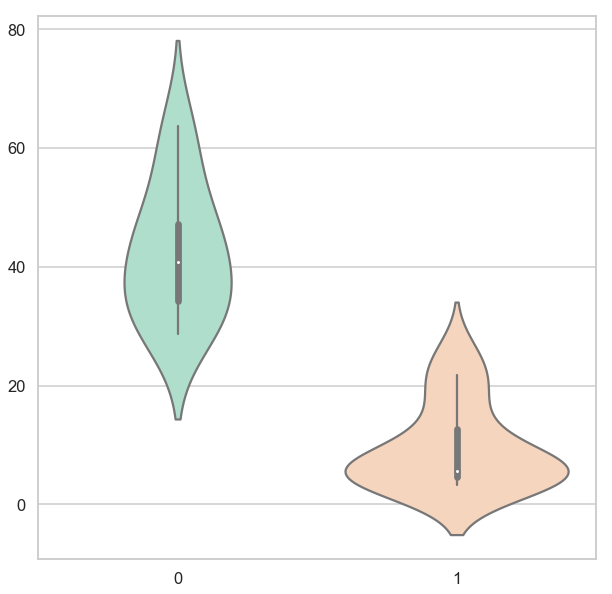

In [147]:
color_setting(n_color=2)
data = fear.append(oo)
f,ax1 = plt.subplots()
sns.violinplot( data=[fear,oo])#, color=color_list[0],whis=np.inf, ax=ax1)
#sns.violinplot( data=oo, color=color_list[1],whis=np.inf, ax=ax1)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


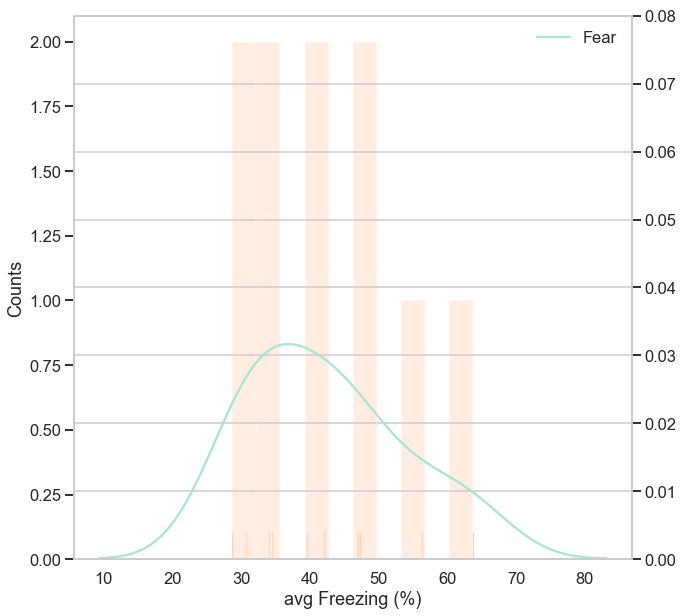

In [139]:

f,ax1 = plt.subplots()
color_list = ['#a8e6cf','#ffd3b6']
#sns.distplot(fear,bins = 15,color=color_list[0],ax=ax1, rug=True, kde=False)
sns.distplot(fear,bins = 10,color=color_list[1], ax=ax1, rug=True, kde=False) #hist_kws=dict(alpha=0.2),
#x3=ax.twinx()
sns.boxplot(x=fear, ax=ax2)
#ax3.set(ylim=(-5,5))


#d_list[i] = d_list[i][np.isnan(d_list[i])==False] 
#pd.isnull
#ax1.set_xticklabels(labels, fontdict=None, minor=False, **kwargs)¶
ax2 = ax1.twinx()
ax2.set_ylim(0,0.08)
#x1.set_xlim(0,40)
#x2.yaxis.set_ticks([]), 
#sns.boxplot(x=oo, width=0.1,  linewidth = 2, color = color_list[1],ax=ax2)# notch=True,
#ax2.set_ylabel('norm')
sns.kdeplot(fear,color=color_list[0],ax=ax2, label='Fear')
#ns.kdeplot(oo,color=color_list[1],ax=ax2, label='OFL')
ax1.set_xlabel('avg Freezing (%)')
ax1.set_ylabel('Counts')
f.savefig('dist.png', transparent = True, dpi=200)    
ax1.grid(False)
#x2.spines['top'].set_visible(False)
#x2.spines['right'].set_visible(False)

In [13]:
def defaultPlotting(): 
    #sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":20,"axes.titlesize":20,"axes.labelsize":20},style="white")
    sns.set(rc={"axes.labelsize":0},style="white")

defaultPlotting()
label = [ 'Fear (n=22)','OFL (n=30)']
color_list = ['#a8e6cf','#ffd3b6']


In [11]:

i=1
data = [fear,oo]

bins = 7
ylim=[0.025, 0.08]
f,ax1 = plt.subplots()
#sns.distplot(fear,bins = 15,color=color_list[0],ax=ax1, rug=True, kde=False)
sns.distplot(data[i],bins = bins,color=color_list[i], ax=ax1, rug=True, kde=False) #hist_kws=dict(alpha=0.2),

#ax3.set(ylim=(-5,5))


#d_list[i] = d_list[i][np.isnan(d_list[i])==False] 
#pd.isnull
#ax1.set_xticklabels(labels, fontdict=None, minor=False, **kwargs)¶
ax2 = ax1.twinx()
ax2.set_ylim(0,ylim[i])
#ax1.set_xlim(20,100)
ax2.yaxis.set_ticks([])
#ax2.set_ylabel('norm')
#sns.kdeplot(fear,color=color_list[0],ax=ax2, label='Fear')
sns.kdeplot(data[i],color=color_list[i],ax=ax2, label=label[i])
ax1.set_xlabel('avg Freezing (%)')
ax1.set_ylabel('Counts')
ax1.grid(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
f.savefig('dist.png', transparent = True, dpi=200)    

NameError: name 'fear' is not defined

In [221]:
plt.plot()
#b_m = np.mean(data.values[:,0:5],axis=1)
#ofl_m = np.mean(data.values[:,5:], axis=1)

[['1-1' 1 0.45 'obs']
 ['1-1' 2 0.56 'obs']
 ['1-1' 3 3.59 'obs']
 ...
 ['dem9' 7 63.73 'dem']
 ['dem9' 8 60.34 'dem']
 ['dem9' 9 67.71 'dem']]


In [135]:
dd =data.assign(avg = lambda x: (x.freezing)*2)
dd.head()
titanic = sns.load_dataset('titanic')

def is_old_func(row):
    return row['age'] > 60
titanic['is_old'] = titanic.apply(is_old_func, axis='columns')


In [137]:
data.head()

,subject,timebin,freezing,obsdem
0,1-1,1,0.45,obs
1,1-1,2,0.56,obs
2,1-1,3,3.59,obs
3,1-1,4,2.57,obs
4,1-1,5,3.13,obs


In [195]:

base=data[data.timebin<=5]#.mean()
base = base.pivot_table(index='subject', columns = ['timebin'], values='freezing')
base_m = base.mean(axis=1)
data.assign(base = base_m)

ofl=data[data.timebin>5]#.mean()
ofl = ofl.pivot_table(index='subject', columns = ['timebin'], values='freezing')
data.assign(avg =base.mean(axis=1))
data['avg']=ofl.mean(axis=1)
d = data.pivot_table(index='subject',  values='freezing')
#d['avg'] = ofl.mean(axis=1)


In [154]:
os.getcwd()
path_3 = 'F:\\'
os.chdir(path_3)
data = '/python/data/tube/total_tube_ofl.xlsx'
aa =pd.read_excel(data)
#aa.columns[0].
#aa= aa.rename(index=str, columns={"OFL": "avg OFL (%)", "rank":'Rank'})
# 5 5 5 4 5 5 

5
obs4     7.6875
NaN      9.4950
obs2    11.0925
obs3    14.3150
obs1    18.7475
Name: OFL, dtype: float64
5
5
obs7     1.3975
obs8     3.3525
obs9     6.2275
obs10    7.2600
obs6     7.3175
Name: OFL, dtype: float64
10
5
obs13     6.6450
NaN       7.7925
obs11    11.5975
NaN      15.0100
obs12    16.9125
Name: OFL, dtype: float64
15
4
obs17     4.1950
NaN       4.3025
obs18     4.5025
obs20    20.6500
Name: OFL, dtype: float64
19
5
obs4     2.0700
obs_1    3.1575
obs5     5.2500
obs2     6.9875
obs3     8.9475
Name: OFL, dtype: float64
24
5
obs2-1     3.2150
obs2-4     3.7700
obs2-3     5.6450
obs2-2     9.4125
obs2-5    14.4075
Name: OFL, dtype: float64
29


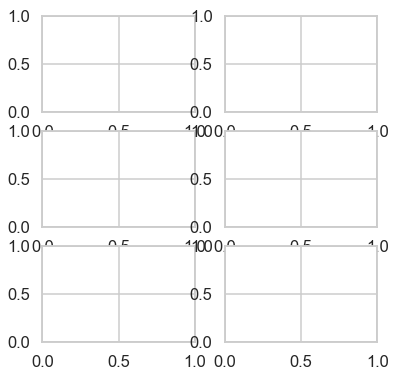

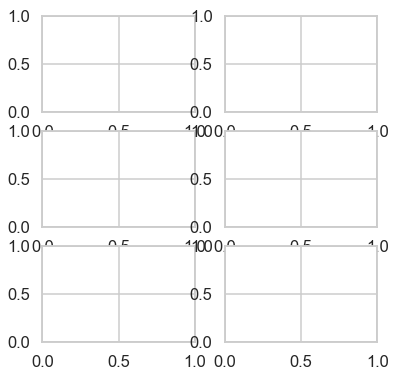

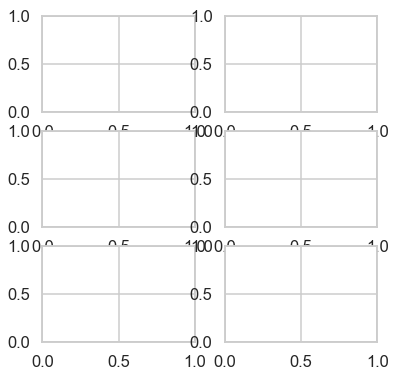

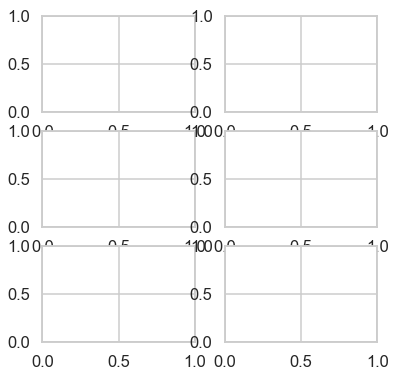

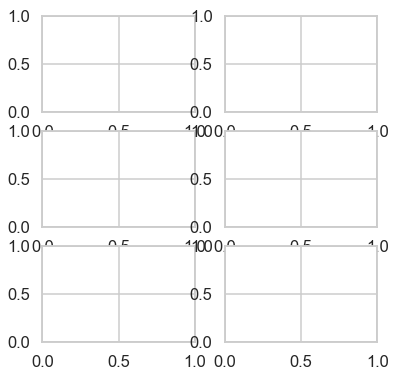

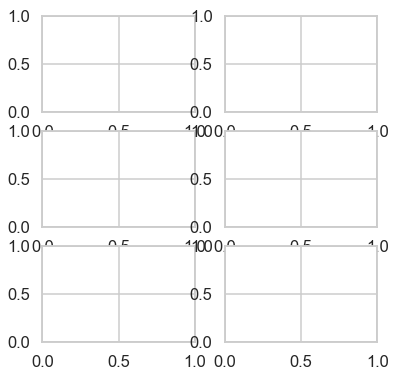

In [156]:
#aa.sort_values(by=aa.keys()[0])
n_list = [5, 5, 5, 4, 5, 5]
idx = 0
sort.sort_values()
tp=[]
for i in n_list:
    print(i)
    sort= data[idx:idx+int(i)].sort_values()
    print(sort)
    fig, ax = plt.subplots(3,2,figsize=(6,6))
    #sns.barplot(x=data=sort, ci=None,ax=ax)
    
    tp.append(sort)
    idx+=int(i)
    print(idx)
#aa[aa.keys()[1]]

In [178]:
print(os.getcwd())
os.chdir('/python/data/tube/')
df = pd.read_excel('rank_ofl.xlsx', index_col=0)#, header=None, skiprows=3).iloc[:,0:time_bin+1]
#col_names = pd.read_excel('rank_ofl.xlsx', index_col=0).columns

#df = df.reset_index()
#df.rename(columns={0:'subject'}, inplace=True)

#df['Rank']=df.Rank.astype(int)

df['Rank']=df['Rank'].fillna(0).astype(int)
#df.Rank.astype(int)
#df.head()
df = df[df.index != 144] # baseline 높은 쥐 제거
#df_r = df.pivot_table(index=df.keys()[0],columns = df.keys()[2],values=df.keys()[1])

df = df[df['Rank']>0]

F:\


In [183]:
df_empathy = df.pivot_table(index=df.index,columns=df.keys()[3], values=df.keys()[2])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


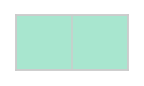

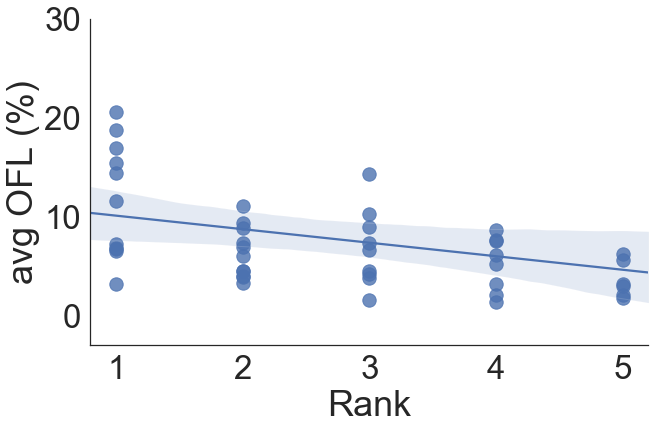

'F:\\python\\data\\tube'

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
params = {
   'axes.labelsize': 8,
    "axes.titlesize":8,
    "axes.labelsize":5,
   
    #'lines.linewidht':2,
    'lines.markersize' : 2,
    'axes.grid':False,
   'font.size': 18,
   'legend.fontsize': 10,
   'legend.frameon':False,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   #'text.usetex': False,
   'figure.figsize': [5, 5] # instead of 4.5, 4.5
    #'xtick.major.size':100
   }
marker_size=180
color_setting()
#plt.rcParams.update(params)

#plt.rcParams['figure.figsize'] = (20.0, 10.0)
#plt.rcParams['font.family'] = "serif"
#import seaborn as sns; sns.set(
sns.set(style="white", font_scale=3, color_codes=True)#, 
    
fig, ax1 = plt.subplots()
sns.regplot(data=df, x=df.keys()[1], y=df.keys()[0], scatter_kws={'s':marker_size},ax=ax1)

ax1.grid(False)
ax1.set(ylim=(-3,30))#, xlim=(0,6))

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
#color = pastel_rainbow[0]
from matplotlib.ticker import MaxNLocator
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()
#graph = sns.jointplot(data=aa, x='rank', y='OFL', kind='reg', color='g', xlim=(0,6), ylim=(-10,30)) #kind = kde
title = 'ofl_rank'
fig.savefig('{}_reg.png'.format(title), transparent = True, dpi=200)    
os.getcwd()

In [96]:
df

,avg OFL (%),Rank,weight,Empathy,group
subject,,,,,
211,3.1575,1,NaN,NaN,dom
212,6.9875,2,NaN,NaN,dom
213,8.9475,3,NaN,NaN,NaN
214,2.0700,5,NaN,NaN,sub
215,5.2500,4,NaN,NaN,sub
221,3.2150,4,NaN,NaN,sub
222,9.4125,2,NaN,NaN,dom
223,5.6450,5,NaN,NaN,sub
224,3.7700,3,NaN,NaN,NaN


In [37]:
import os
import pandas as pd
os.chdir('/python/data/tube/')
os.getcwd()
#path_3 = 'F:\\'
#os.chdir(path_3)
#data = '/python/data/ofl_rank.csv'
data = 'total_tube_ofl.xlsx'
aa =pd.read_excel(data)
#aa.columns[0].
#aa= aa.rename(index=str, columns={"OFL": "avg OFL (%)", "rank":'Rank'}) 


In [32]:
p=3
if p:
    print(p)

3


In [39]:
aa.iloc[:,3]

obs1      19.1875
obs2       3.6700
obs3       9.5950
obs4       3.8350
NaN        1.4225
obs6      12.1575
obs7       2.0375
obs8       0.3625
obs9       9.8625
obs10      6.0350
obs11     10.0900
obs12      8.3825
obs13      3.9400
NaN       12.6825
NaN        1.3125
NaN       14.8550
obs17      3.8875
obs18      1.7050
obs20      9.2450
obs_1     11.7850
obs2       2.7950
obs3       8.1275
obs4       2.5725
obs5       1.3700
obs2-1     9.9950
obs2-2     2.1550
obs2-3     2.5125
obs2-4     0.5600
obs2-5     6.4250
Name: Ret, dtype: float64

In [44]:
a=aa.iloc[:,3]
len(a.shape) ==1

True

In [194]:
import seaborn as sns
d = data.pivot_table(index='subject', columns = ['timebin'], values='freezing')
d.mean(axis=1)
#data['timebin'==0:5]
#data.assign(avg=)
#data.plot.hist()
#sns.jointplot(data=data, x='subject', y='timebin', kind='reg', color='g')
#plt.show()
base_m = np.mean(d.values[:,0:5], axis=1)
ofl_m = np.mean(d.values[:,5:9], axis=1)


In [134]:
os.getcwd()

'F:\\'